<a href="https://colab.research.google.com/github/diplomado-bigdata-machinelearning-udea/Curso2/blob/master/s07/S7_C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> Diplomado de Análisis de datos y Machine Learning en Python</h1>


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

Empecemos por usar la versión 2 de de tensor flow:

In [ ]:
%tensorflow_version 2.x

# Repaso

## Perceptrón Multicapa

Un Perceptrón es básicamente un modelo de clasificacion lineal, donde usa como función de activación la función de heaviside, la cual recordemos tiene la siguiente forma:

 $heaviside(x)=\begin{cases} 
      0 & x < 0 \\
      1 & x\geq 0 
   \end{cases} $


Donde el perceptrón es considerado un algoritmo supervisado, cuyos pesos son los $w_{i}$ y el termino $b$ (bias) que podemos ver en las imagenes. 

<div style="text-align: center;">
    <img src="https://i.imgur.com/vNWd4os.png" height="300px"/>
</div>


Cuando ingresamos nuestros datos, este realiza una suma pesada definda como:

$z=\sum_{i=1}^{m}x_{i}w_{i}+b$

Es decir, cada entrada es multiplicada por un peso(el cual normalmente se inicia de forma aleatoria) y los resultados son sumados junto al b.

<p><img alt="Colaboratory logo" height="300px" src="https://s3.amazonaws.com/stackabuse/media/intro-to-neural-networks-scikit-learn-3.png" align="center" hspace="10px" vspace="0px"></p>

El perceptrón multicapa a diferencia del perceptrón trabaja bien en los casos donde tenemos datos separables no lineales. En las redes neuronales tenemos una capa de entrada, otra de salida y una o multiples capaz ocultas. Como se puede ver las conexiones siempre están dirigidas hacia adelante es decir, las neuronas de una capa se conectan con las neuronas de la siguiente capa.

Los pesos dentro de nuestra red neuronal típicamente están expresados como $w_{ij}^{[l]}$, donde "$l$" hace referencia a nuestra capa. De forma matricial podemos expresar los valores para la capa $l$ como:

\begin{equation}
Z^{[l]}=X^{[l-1]}W^{[l]}+B^{[l]}
\end{equation}

Donde $X$ es la matriz de tamaño $m\times n^{[l-1]}$, $W^{[l]}$ de $n^{[l-1]}\times n^{[l]}$ y $B$ de $1\times n^{[l]}$. Donde de nuevo $n^{[l]}$ hace referencia al número de neuronas en la capa $l$.  Donde tenemos que $X^{[l]}$ viene dada por 

\begin{equation}
X^{[l]}=f^{[l]}(Z^{[l]})
\end{equation}

Con $f^{[l]}$ la función de activación de la capa $l$.

## Regresión

El problema de regresión implica obtener un valor continuo de una variable (Por ejemplo, el precio de una casa). En estos casos, se tiene por lo general:

*   Una neurona con función de activación lineal en la última capa
<img height=300px src="https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/linear_af.png?raw=true">

*   Función de costo MSE

$$\text{MSE}(y,\hat{y}) = \frac{1}{n}\sum_{i=0}^n (y-\hat{y})^2$$



## Clasificación Binaria

La clasificación binaria se usa en problemas dónde se quiere clasificar una de manera negativa (0) o positiva (1). Por ejemplo al clasificar un tumor como benigno (0) o maligno (1). En estos casos se usa por lo general:

* Una neurona con función de activación sigmoide en la última capa

<img height=300px src="https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/sigmoid_af.png?raw=true">

* Función de Costo Entropía Cruzada

$$ H_p(q)=-\frac{1}{N}\sum_{i=0}^n(y_i\text{log}(p(y_i))+(1-y_i)\text{log}(1-p(y_i)))$$

## Clasificación Multiclase

La clasificación multiclase se usa en problemas en las que se tienen varias categorías excluyentes. Por ejemplo detectando el animal presente en una fotografía. En estos casos se tiene por lo general:

* K neuronas en la capa final (una por cada categoría) con función de activación Softmax

<img height=200px src="https://miro.medium.com/max/906/1*670CdxchunD-yAuUWdI7Bw.png">

* La función de activación es la entropía cruzada categórica

$$L=-\sum_{c=1}^K y_{o,c}\text{log}(p_{o,c})$$

## Otras Funciones de Activación


### Tanh

Corresponde a una función trigonométrica hiperbólica (ver siguiente figura), la cual es representadapor la ecuación:

$$\text{tanh}(x) = \frac{\text{sinh(x)}}{\text{cosh(x)}}=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$$

<img height=300px src="https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/tanh_af.png?raw=true">

A diferencia de la función sigmoide, el rango de salida de tanh varía entre -1 y 1. La ventaja de tanh es puede tratar los números negativos de forma más eficiente que la función sigmoide.

### ReLU: Rectified Linear Unit (Unidad Rectificada Lineal)

La unidad rectificada lineal es una trasformación más intersante que activa un nodo solo si la entrada se encuentra por encima de cierta cantidad. Si la entrada está por debajo de zero, la salida es cero, pero si la entrada alcanza un valor umbral, la salida tiene una relación lineal con la variabe dependiente $\text{max}(0,x)$, como se observa en la siguiente figura:

<img height=350px src="https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/relu_af.png?raw=true">

Las funciones de activaciones ReLU están actualmente entre el estado de arte en la aplicación de funciones de activación, ya que han demostrado un buen desempeño en diferentes situaciones. Dado que el gradiente de la ReLU es cero o constante, permite evitar el problema del desvanecimiento del gradiente. Las funciones de activación ReLU han demostrado un mejor entrenamiento en la práctica que las funciones de activación sigmoides. 

Las funciones de activación ReLU se usan, normalmente, en las capas ocultas.

## Gradiente que Explota

### Gradient Clipping

Debe limitarse el valor del gradiente entonces se normaliza el gradiente según un umbral.

*   Clip Norm: Se reescala todo el gradiente para que su norma no supere ciero umbral ($U$). Esta opción tiene la ventaja de conservar la dirección del gradiente:
$$\nabla J \to \nabla J \frac{U}{|\nabla J|}$$
*   Clip Value: Se reescalan únicamente los valores que superen cierto umbral ($U$).
$$(\nabla J)_i \to (\nabla J)_i \frac{U}{|\nabla J|_i}$$


## Gradiente que Desaparece

### Funciones de Activación que no se saturan

La función de activación ReLU permite tener gradientes que no se saturan. Además, debido a la muerte de las neuronas (ReLU death) se comporta como una regularización dropout.

<img height=350px src="https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/relu_af.png?raw=true">

La función de activación SELU permite de igual manera tener gradientes que no se saturan y adicionalmente normaliza automáticamente los datos.

<img height=350px src=https://cdn-images-1.medium.com/max/1600/1*m0e8lZU_Zrkh4ESfQkY2Pw.png/>

### Inicialización de los parámetros

Distribución normal con media 0 y varianza
\begin{equation}
\sigma^2 = \frac{1}{fan_{avg}}
\end{equation}

O una distribución uniforme entre $−r$ and $+r$,
\begin{equation}
r = \sqrt{\frac{3}{fan_{avg}}} = \sqrt{3\sigma^2}
\end{equation}


donde 


* $fan_{avg} = \frac{1}{2} (fan_{in} + fan_{out})$


* $fan_{in}$ es el numero de neuronas de entrada 

* $fan_{out}$ es el numero de neuronas de salida 

### Batch Normalization

Consiste en normalizar los datos en capas intermedias haciendo primero una estandarización

$$X^l\to \frac{X^l-\mu^l}{\sigma^l}$$

Seguida de un reescalamiento

$$X^l\to \gamma \frac{X^l-\mu^l}{\sigma^l}+\beta$$

Dónde $\mu^l$ y $\sigma^l$ son parámetros que se calculan durante el entrenamiento mientras que $\gamma$ y $\beta$ son parámetros a optimizar

## Overfitting

### Regularización L1

Consisten en añadir un término a nuestra función de costo, para castigar los valores grandes de los parámetros en nuestra matriz de pesos y así restringirlos a pequeños valores

\begin{equation}
J(W,b)=\frac{1}{m}\sum_{i}^{m}L(\hat{y}^{(i)},y^{(i)}) + \frac{\lambda}{2m}\sum_{l=1}^{L}||W^{[l]}||
\end{equation}

### Regularización L2

\begin{equation}
J(W,b)=\frac{1}{m}\sum_{i}^{m}L(\hat{y}^{(i)},y^{(i)}) + \frac{\lambda}{2m}\sum_{l=1}^{L}||W^{[l]}||^{2}_{F}
\end{equation}

### Dropout

Dropout consiste en que en cada paso de entrenamiento se quitarán ciertas neuronas de nuestra red, es decir se tendrá cierta probabilidad "**P**" de que una neurona sea quitada o apagada (hacerla cero) durante ese paso del entrenamiento, para esto se tendrá en cuenta la capa de entrada y se excluíra la capa de salida.

<p><img alt="Colaboratory logo" height="150px" src="https://miro.medium.com/max/1354/1*skMXofkjeXtKzSr5lqIEmg.png" align="center" hspace="10px" vspace="0px"></p>

### Early Stopping

Este  es un tipo de método de validación cruzada, el cual conciste en analizar el conjunto de validación y en el momento en que su error empiece a aumentar detener el entrenamiento. [callbacks](https://keras.io/callbacks/)

<p><img alt="Colaboratory logo" height="250px" src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/04/Screen-Shot-2018-04-04-at-12.31.56-AM.png" align="center" hspace="10px" vspace="0px"></p>

## Redes Neuronales Profundas (DNN)

La complejidad del problema a analizar está relacionado directamente con la profundidad del modelo de redes neuronales a implementar. Por ejemplo, si se desea deterctar varios tipos de objetos dentro de una imagen de alta definición, debemos implementar redes neuronales profundas (tal vez de 10 capas o más), cada una de las capas con cientos de neuronas con miles de conexiones entre si. Los tipos de arquitecturas de DNN presentan los siguientes problemas:

- Desvanecimiento/explosión del gradiente que las capas inferiores sean más dificiles de entrenar.

- No contrar con una gran cantidad de datos para entrenar estas redes o que sea muy dificil realizar un etiquetado.

- Proceso de entrenamiento lento.

- Un modelo con tantos parámetros corre el riesgo de sufrir de sobre ajuste a los datos de entrenamiento, en especial, sino se cuenta con suficientes instacias para entrenarlo, o si se cuenta con datos ruidosos. 

**Metodos para hacer posible una DNN**

Recordemos los métodos que aplicabamos para resolver los problemas mencionados anteriormente. Algunos de los problemas de desvanecimiento/explosión del gradiente pueden ser solucionados aplicado alguna (o varias) de las siguientes técnicas: 

* Inicialización Glorot y He.
* Uso de funciones de activación no saturadas.
* Normalización por lotes (Batch Normalization).
* Recorte del gradiente.

**Métodos para disminuir el costo computacional de las DNN**

En primer lugar, el costo computacional se entiente como el consumo de memoria, recursos y tiempo de computo de un problema computacional. En este sentido, el costo computacional se puede disminuir aplicando alguna de las siguientes ténicas (de forma conjunta o por separado)

- Reutilización de capas preentrenadas: transferencia de conocimiento: *Transfer Learning*.
- Optimización de los algoritmos de descenso del gradiente: Optimización del momentum, Gradiente ascelerado de Nesterov, AdaGrad, RMSprop, etc.

**Métodos para evitar el sobreajuste**

Los métodos para evitar el sobreajuste 

- Parada temprana  (Early stopping)
- Normalización por lotes (también sirve para este fin).
- Regularizaciones $l_1$ y $l_2$
- Dropout

In [ ]:
%tensorflow_version 2.x

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Train: 0.854, Test: 0.852


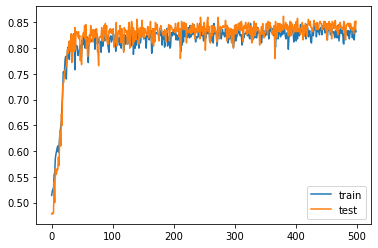

In [ ]:
# deeper mlp with relu for the two circles classification problem
from tensorflow import keras
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
from tensorflow.keras.optimizers import SGD
from keras.initializers import RandomUniform
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# Definición del Modelo
model = Sequential()
model.add(Dense(5, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

**Ejercicio: Reconocimiento de dígitos escritos a mano de la base de datos MNIST:**

**1)** Agrege el modelo `Secuencial` de `keeras`; agrege las capas `Dense`,`Activation` y `Dropout`; importe el optimizador de `keras` de `RMSprop`; importe el dataset de `mnist`; importe de `keras.utils` `np_utils`. Importe también las libretrias de `matplotlib` y `numpy`.

**2)** Almacene el dataset `mnist` en un par de variables de entrenamiento y evaluación.

**3)** Visualice los 10 primeros elementos almacenados en `X_train`. Haga uso de la función `imshow` y aunmente el tamaño del box de la figura para visualizar los elementos graficados con mayoy claridad.

**4)** Visualice en un histograma la distribución de los valores de los píxeles junto a la primera imagen del conjunto `X_train`. 

**5)** Para ayudar a reducir un poco el tiempo de entrenamiento, normalice los datos almacenándolos en una matriz de vectores de una sola dimensión por cada imagen. Imprima las dimensiones del conjunto de datos antes y después para corroborar sus dimensiones. 

**6)** Imprima una lista con todos los valores *diferentes* las de las etiquetas de las instancias.

**7)** Codifique las categorías (digitos de 1-9) usando one-hot encoding e imprima las dimensiones de la variable `y_train`/`y_test` antes y despuás de realizar la codificación.

**8)** Defina un modelo con tres capas: las dos primeras con 512 neuronas y una función de activación ReLU, y la última una capa softmax. Defina entre las capas un "Dropout" del 20%.

**9)** Compile el modelo con una función de perdida `categorical_crossentropy`, una metrica `accuracy` y un optimizador `adam`.

**10)** Defina un objeto `history` donde entree el modelo por batchs de tamaño 128, en 20 épocas y usando como datos de validadación el conjunto de test.

**11)** Realice una gráfica de precisión del modelo y el conjunto de evaluación, asi como las funciones de perdida en cada grupo.

Para ver la solución haga doble click **aquí**

<!--------
#P1:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

#P2:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#P3:
fig = plt.figure(figsize=(10,10))

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digito: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

#P4:
fig = plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit:{}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Distribución de valores de píxeles")

#P5:
# Veamos las dimensiones de los datos antes de realizar el reshape y la normalización
print("X_train shape",X_train.shape)
print("y_train shape",y_train.shape)
print("X_test shape",X_test.shape)
print("y_test shape",y_test.shape)

# Construcción del vector de entrada a partir de las imágnes de 28x28
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizacion de los datos para facilitar el entrenamiento
X_train /= 255
X_test /= 255

# Impresión del las dimensiones del vector de entrada para el entrenamiento y evaluación
print("Tamaño de la Matriz de entrenamiento",X_train.shape)
print("Tamaño de la Matriz de evaluación",X_test.shape)

#P6:
print(np.unique(y_train, return_counts=True))

#P7:
# One -hot encoding usando las utilidades de numpy de keras.
n_clases = 10
print("Dimensiones antes de aplicar one-hot encoding",y_train.shape)
y_train = np_utils.to_categorical(y_train, n_clases)
y_test = np_utils.to_categorical(y_test, n_clases)
print("Dimensiones antes de aplicar one-hot encoding",y_train.shape)

#P8:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

#P9:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
optimizer='adam')

#p10:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=2, validation_data=(X_test,y_test))

#P11:
# plotting the metrics
fig = plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
------>


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
28*28

784

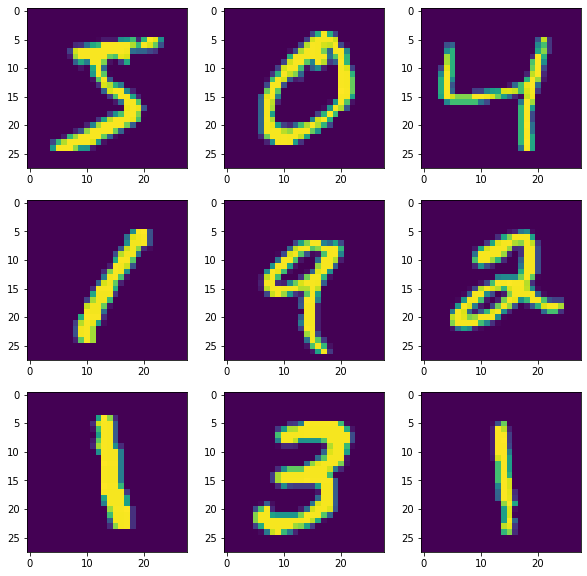

In [ ]:
fig = plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i])

(array([618.,   2.,   3.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          3.,   0.,   0.,   1.,   0.,   2.,   0.,   5.,   0.,   0.,   0.,
          0.,   1.,   1.,   1.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   1.,   1.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,
          0.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   2.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   2.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   1.,   0.,
          1.,   1.,   0.,   1.,   2.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

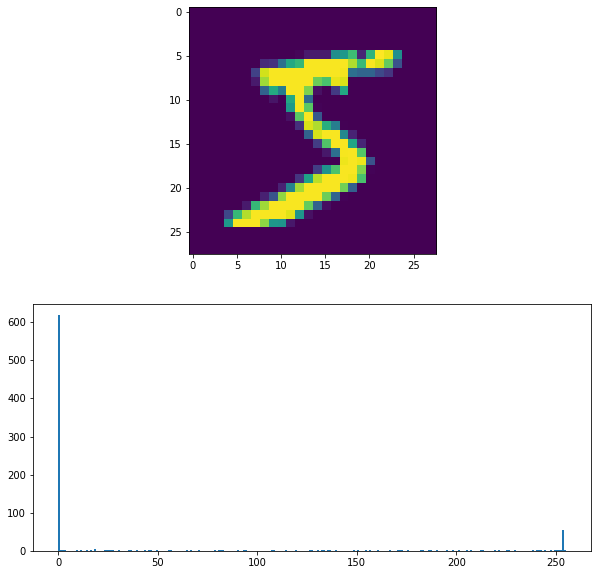

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.imshow(X_train[0])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(28*28), bins=255)


In [ ]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
X_train = X_train/255
X_test = X_test/255

## Redes Convolucionales

### Capas convolucionales

las capas de convolución aprenden patrones locales, en el caso de imágenes, patrones encontrados en pequeñas ventanas de las caracteristicas de entrada. 

<p><img alt="Colaboratory logo" height="300px" src="https://i.imgur.com/qdvojdR.png" align="center" hspace="10px" vspace="0px"></p> 

Esta característica clave otorga a las capas convolucionales dos propiedades interesantes:

* Los patrones que aprenden son invariantes bajo translaciones. 

* Pueden aprender jerarquías espaciales de patrones.

Matematicamente la correlacion cruzada (en el caso discreto) se defien como:

\begin{equation}
S[t] = (X * W)(t) = \sum_a X[a]W[t+a]
\end{equation}

![](http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif)

### Padding

Consiste en agregar filas y columnas de ceros para lidiar con los problemas de borde. Por ejemplo para una imagen 5x5 y un kernel 3x3

<p><img alt="Colaboratory logo" height="250px" src="https://i.imgur.com/p1MdvHF.png" align="center" hspace="10px" vspace="0px"></p> 

### Pooling

En la etapa de Polling vamos a calcular un resumen estadístico de nuestra imagen. Esto permite

* Reducir la imagen de entrada para reducir la carga computacional, el uso de memoria y el número de parámetros.

* Introducir cierto nivel de invariancia a pequeñas traslaciones.

Hay diferentes formas de hacer pooling , entre las más conocidas están Max Polling

<p><img alt="Colaboratory logo" height="300px" src="https://i.imgur.com/BW48gCv.png" align="center" hspace="10px" vspace="0px"></p>

### Arquitectura

<p><img alt="Colaboratory logo" height="300px" src="https://i.imgur.com/BqlLRkJ.png" align="center" hspace="10px" vspace="0px"></p>


#Ejemplo de CNN

Utilizaremos una red convolucional para clasificar gatos y perros, las imagenes a usar pueden ser descargadas usando este [link](https://drive.google.com/open?id=1Q7ETlUPZj8N0GcD85ZGKjygbIcX1o4hQ)

Una vez desargado los datos en nuestro google drive, procedemos a importar estos mismos, para esto debemos comenzar a acceder a nuestro google drive desde google colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Ahora accedemos a la carpeta donde se encuntran las imagnes

In [ ]:
cd /content/drive/My Drive/data

/content/drive/My Drive/data


In [ ]:
ls

images.npy  labels.npy


Procedamos ahora a importar las imagenes , pero primero importemos algunas de las librerias que nos seran de utilidad 

In [ ]:
%tensorflow_version 2.x

In [ ]:
from tensorflow import keras

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
images = np.load('images.npy')
labels = np.load('labels.npy')

veamos las dimensiones y algunas images de los datos que acabamos de importar 

In [ ]:
images.shape

(2000, 150, 150, 3)

In [ ]:
labels.shape

(2000,)

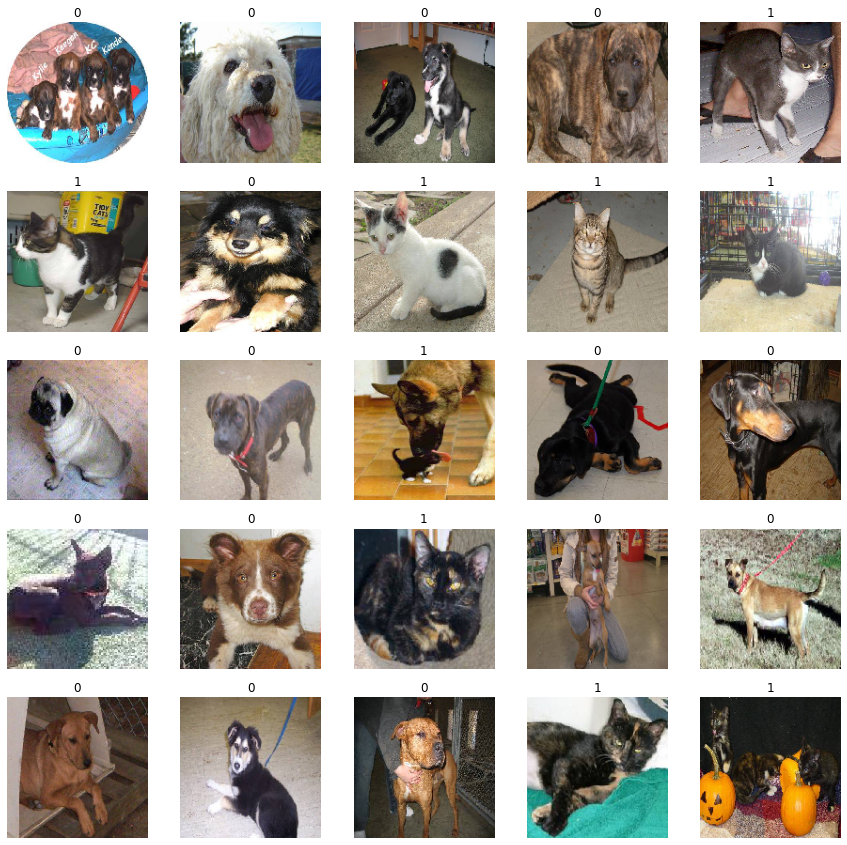

In [ ]:
fig, ax = plt.subplots(5,5,  figsize=(15,15))

for i , ax in enumerate(ax.flat):
  ax.imshow(images[i])
  ax.set_title(labels[i])
  ax.axis('off')

Ahora procedamos a crear nuestro modelo de CNN usando keras

In [ ]:
keras.backend.clear_session()

In [ ]:
model  = keras.models.Sequential([
                                  keras.layers.Conv2D(32, kernel_size=3, activation='elu', padding='same',kernel_initializer='he_normal' ,input_shape=(150,150,3)),
                                  keras.layers.BatchNormalization(),
                                  keras.layers.Conv2D(32, kernel_size=3, activation='elu', padding='same',kernel_initializer='he_normal'),
                                  keras.layers.BatchNormalization(),
                                  keras.layers.Dropout(0.2),
                                  keras.layers.MaxPool2D(strides=2),

                                  keras.layers.Conv2D(64, kernel_size=3, activation='elu', padding='same',kernel_initializer='he_normal'),
                                  keras.layers.BatchNormalization(),
                                  keras.layers.Conv2D(64, kernel_size=3, activation='elu', padding='same',kernel_initializer='he_normal'),
                                  keras.layers.BatchNormalization(),
                                  keras.layers.Dropout(0.3),
                                  keras.layers.MaxPool2D(strides=2),

                                  keras.layers.Conv2D(128, kernel_size=3, activation='elu', padding='same',kernel_initializer='he_normal'),
                                  keras.layers.BatchNormalization(),
                                  keras.layers.Conv2D(128, kernel_size=3, activation='elu', padding='same',kernel_initializer='he_normal'),
                                  keras.layers.BatchNormalization(),
                                  keras.layers.Dropout(0.4),
                                  keras.layers.MaxPool2D(strides=2),

                                  keras.layers.Flatten(),
                                  keras.layers.Dense(128, activation='selu', kernel_initializer='lecun_normal'),
                                  keras.layers.Dropout(0.5),
                                  keras.layers.Dense(1, activation='sigmoid')

])

veamos que todo esta deacuerdo a lo qeu se espera

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
dropout (Dropout)            (None, 150, 150, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        1

pasemos a compilar el modelo 

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['acc'])

Ahora veamos como se desempeña nuestro modelo 

In [ ]:
history = model.fit(images, labels, epochs=30, validation_split=0.2, batch_size=20)

## **Encoder-Decoder**

En general la arquitectura que se tiene para este caso tiene la forma siguiente:


<p><img alt="Colaboratory logo" height="300px" src="https://i.imgur.com/GSAkHbb.png" align="center" hspace="10px" vspace="0px"></p>


Donde el encoder acepta una entrada la cual lleva a cierta representación y el decoder produce una recosntrucción de esta información retornando el valor de entrada a la salida. En nuestro caso, nosotros podemos evidenciar esto en lo que se denomina **Autoencoders**


## **Autoencoders**

Son redes neuronales capaces de aprender representaciones útiles de los datos sin supervisión; básicamente buscan hacer una copia de la entrada en su salida, algo como:

\begin{equation}
h=f(x) \rightarrow  r=g(h)
\end{equation}


Donde en lo anterior, $x$, es nuestra entrada y en un caso ideal o perfecto tendríamos que $r=g(f(x))=x$ como salida. Es decir estamos codificando la información y luego reconstruyendola, donde no se desea tener una recosntrucción perfecta, mas bien se necesita una aproximación de la entrada en la salida, pues así nuestro modelo priorizará en ciertas características de nuestros datos al momento de darse el aprendizaje, básicamente las restricciones que pongamos obligarán nuestra red a tener un aprendizaje, evitando asi volverse una tarea trivial. Es más como encontrar patrones (características) en nuestros datos, que simplemente tener una tarea de memoria.

<p><img alt="Colaboratory logo" height="300px" src="https://i.imgur.com/MewsQhE.png" align="center" hspace="10px" vspace="0px"></p>

Estos normalmente tienen una estructura de red como las ya trabajadas, donde el output tiene le mismo número de neuronas que la entrada, donde se tendrá una función de costo que penalizará la diferencia entre la entrada y la salida. Normalmente los autoencoders se utilizan en tareas de reducción de dimensión, detección de características y modelos generativos.



<p><img alt="Colaboratory logo" height="300px" src="https://i.imgur.com/MKpfWuk.png" align="center" hspace="10px" vspace="0px"></p>

Con los autoencoders normalmente no estamos interesados en el output, mas bien en el paso intermedio ($h$ en la anterior imagen), es decir el resultado que obtenemos del encoder; cuando la salida del encoder tiene una dimensión menor que su entrada, llamamos a este un "Undercomplete Autoencoder", que esta de cierta manera es una restricción en nuestro autoencoder. Veamos algunas aplicaciones de estos.

## **PCA con Undercomplete Autoencoders**

Nosotros podemos utilizar un autoencoder para realizar actividades de reducción de dimensión, PCA (principal component analysis), donde para esto usaremos una activación linear. Veamos como se puede realizar de manera simple. 

In [ ]:
from tensorflow import keras
%tensorflow_version 2.x

In [ ]:
encoder=keras.models.Sequential([keras.layers.Dense(2,input_shape=[3])])
decoder=keras.models.Sequential([keras.layers.Dense(3,input_shape=[2])])
autoencoder=keras.models.Sequential([encoder,decoder])
autoencoder.compile(loss='mse',optimizer=keras.optimizers.SGD(lr=0.1))

El anterior código es un modelo simple de autoencoder que nos permite realizar una reducción de 3 dimensiones a 2 dimensiones, donde hemos usado un activación lineal. Luego de tener esto simplemente debemos hacer el fit con nuestros datos, recordando que nuestros datos de entrada y salida serán los mismos, de ahí que se considere un  modelo no supervisado.

<p><img alt="Colaboratory logo" height="250px" src="https://i.imgur.com/nKqHEXb.png" align="center" hspace="10px" vspace="0px"></p>


## **Stacked Autoencoders**

Basicamente podemos construir autoencoders con un mayor número de capaz ocultas, lo cual nos permitirá tener una extracción de características de mayor complejidad. Estos son llamados *stacked o deep autoencoders*, donde normalmente se tiene que son simétricos respecto al centro.


<p><img alt="Colaboratory logo" height="250px" src="https://i.imgur.com/C5zcsjE.png" align="center" hspace="10px" vspace="0px"></p>


Donde su implementación en keras es básicamente el extrapolar la idea anterior en PCA, solo que se tendrán más capaz, algo como lo siguiente:



In [ ]:
stacked_e=keras.models.Sequential([keras.layers.Flatten(input_shape=[28,28]),
                                   keras.layers.Dense(100,activation='selu'),
                                   keras.layers.Dense(30,activation='selu')
                                   ])
stacked_d=keras.models.Sequential([keras.layers.Dense(100,activation='selu',input_shape=[30]),
                                   keras.layers.Dense(28*28,activation='sigmoid'),
                                   keras.layers.Reshape([28,28])
                                   ])
stacked_ae=keras.models.Sequential([stacked_e,stacked_d])
stacked_ae.compile(loss='binary_crossentropy',optimizer=keras.optimizers.SGD(lr=1.5))

El anterior autoencoder se construyó teniendo en mente su uso para el mnist dataset. Los stacked autoencoders pueden usarse en casos en los que tenemos pocas etiquetas en nuestros datos, como sabemos el etiquetado puede ser una de las tareas mas costosas a la hora de tener un conjunto de datos, para esto entrenamos un Autoencoder y luego rehusamos sus capas internas, esto es llamado un "*Unsupervised pretraining using stacked autoencoders*", existen otras aplicaciones de estos como, "*tying weights*" y "*greedy layerwise training*"


## **Convolutional Autoencoders**

Como hemos visto en clases pasadas, trabajar con imagenes es más cómodo y eficiente si lo hacemos con redes convolucionales, pues bien los autoencoders pueden usarse también en este campo, donde estos estarán diseñados como una red convolucional y nos brindarán los mismos beneficios que se han mencionado previamente. Para este caso la CNN va reduciendo la dimensionalidad de las entradas mientras se aumenta el número de filtros, lo cual nos permitirá obtener la filtración de características que buscamos. Su implementación es similar a lo que se ha venido haciendo.

In [ ]:
conv_e = keras.models.Sequential([
                                  keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
                                  keras.layers.Conv2D(16, kernel_size=3, padding="same", activation="selu"),
                                  keras.layers.MaxPool2D(pool_size=2),
                                  keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="selu"),
                                  keras.layers.MaxPool2D(pool_size=2),
                                  keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="selu"),
                                  keras.layers.MaxPool2D(pool_size=2)
                                  ])

conv_d =keras.models.Sequential([
                                 keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="valid",activation="selu",input_shape=[3, 3, 64]),
                                 keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="same",activation="selu"),
                                 keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="same",activation="sigmoid"),
                                 keras.layers.Reshape([28, 28])
                                 ])

conv_ae = keras.models.Sequential([conv_e, conv_d])

Donde podemos ver que en el decoder se usó la  transposed convolution, donde para más detalle matemático podemos visitar los siguientes enlaces [link](http://www.iro.umontreal.ca/~lisa/pointeurs/convolution.pdf), [link2](https://arxiv.org/pdf/1603.07285.pdf).


Mas adelante veremos como podemos usar autoencoders con su arquitectura de una red recurrente, los llamados "*Recurrent autoencoders*".


## Denoising Autoencoders

Otra técnica en el cual podemos forzar nuestro autoencoder a obtener ciertas características más complejas , es agregando cierto ruido a nuestras entradas y buscar recuperar el dato original. Podemos encontrar que este puede ser útil a la hora de remover ruido de nuestros datos. 

<p><img alt="Colaboratory logo" height="250px" src="https://i.imgur.com/HEUNMrX.png" align="center" hspace="10px" vspace="0px"></p>


Su implementación en keras es básicamente la misma, solo que esta vez añadimos una capa de Dropout luego de los datos de entrada o una similar que me permita agregar el ruido a mis datos [link](https://keras.io/layers/noise/).


Podemos encontrar otras arquitecturas en los cuales podemos usar autoencoders, como los son "*sparse autoencoders*" y "*variational autoencoders*", donde el primero regularizará mi autoencoder restringiendo las características de salida de mi encoder y el último me permitirá hacer aplicaciones como la creación de nuevos datos a partir de los existentes, para una mayor consulta de estos pueden dirigirse al [libro](https://books.google.com.co/books?id=HnetDwAAQBAJ&printsec=frontcover&dq=aur%C3%A9lien+g%C3%A9ron&hl=es-419&sa=X&ved=0ahUKEwi0m6rH05rnAhUJvlkKHb1DAZEQ6wEIQjAC#v=onepage&q=aur%C3%A9lien%20g%C3%A9ron&f=false).

## Segmentación
Ya hemos usado las redes neuronales convolucionales en el problema de clasificación de objetos en los que tipicamente asiganamos un valor (o clase) a determinado objeto, y mediante una CNN con una capa softmax al final decidimos a qué clase pertenece la imagen de entrada.

Si nos detenemos por un momento a pensar en éste tipo de arquitecturas, usamos una capa densa antes de llegar al clasificador, esto por tanto nos hace perder toda la información espacial que trae la imagen (comprimimos toda la imagen en un una clase).

Habrá casos en los que simplemente saber, por ejemplo, que en una imagen hay una persona o un tumor no sea suficiente, también será necesario saber su ubicación con el fin de tomar alguna decisión, digamos, un coche autonomo o un hipotetico robot que haga operacioner neurológicas. Para dichas tareas es necesario entonces que nuestra arquitectura permita no solo determinar la clase a la que pertenece la imagen, si no, la clase a la que pertenece cada pixel, por tanto la salida de nuestra red debe ser otra imagen, que llamamos mascara, en la cual se muestre cada uno de los objetos que hemos clasificado SEGMENTADOS.

![](https://divamgupta.com/assets/images/posts/imgseg/image15.png?style=centerme)


En ésta imagen podríamos simplemente clasificar que hay una cama,  o una lampara, o cómo lo estamos haciendo acá determinar dónde están con una máscara, en la cual, cada color representa una clase diferente.

Por lo tanto, la tarea será asignar a cada pixel de la imagen una clase a la cual pertenece, lo que en terminos dimensionales quiere decir que podríamos entregar una imagen de $H\times L\times 3$ y la salida sería una matriz de $H \times L$

![](https://divamgupta.com/assets/images/posts/imgseg/image14.png?style=centerme)

La segmentación semantica es un paso más en la tarea de comprender una escena en el mundo de la visión computacional, requiere un entendimiento algo mayor de las imagenes y por tanto usa datos con etiquetados un poco más complejos que la mera tarea de clasificación.

### Arquitectura base de un segmentador con CNN

Como es de esperarse, la mejor opción a la hora de segmentar imagenes es usar una CNN, la cual nos estregará una imagen a la salida  y no un vector con las clases predichas.

![](https://divamgupta.com/assets/images/posts/imgseg/image1.png?style=centerme)

Para lograr ésto se usa como base una arquitectura Coder-Decoder.

En ésta arquitectura se elimina las capas densas que eliminan la iformación espacial y por el contrario se utilizan capas convolucionales cuya estructura tensorial va contrayendo la información en la parte que conocemos como encoder (codifica la información de las carácterísticas de alto nivel) y posteriormente pasan por la sección de decorer, que se encarga de decodificarlas hasta llegar a una imagen del mismo tamaño que la entrada que contiene el mapa de segmentación.

Los auto encoders, como son llamadas éstas estructuras tienen muchisimos usos y son un universo completo en el mundo del deep learning.

![](https://divamgupta.com/assets/images/posts/imgseg/image5.png?style=centerme)

Además, un detalle muy importante es que usar simplemente un coder-decoder puede hacernos perder información de bajo nivel en la compresión que se realiza en la etapa de encoder, por lo tanto usamos lo que se conoce como "skip connections", en las cuales información de una capa en el encoder salta directamente a la capa correspondiente del decoder, haciendo que las segmentaciones reconstruídas sean mejores.

![alt text](https://divamgupta.com/assets/images/posts/imgseg/image6.png?style=centerme)

Otro truco bajo la manga que podemos usar es el transfer learning. Como vimos en las sesiones anteriores, podemos usar redes preentrenadas como extractores de características para ser usados con otros propositos.

En  nuestro caso podemos usar una red preentrenada con imagenes (Resnet, Imagenet, Mobilenet...) y usar partes de sus capas como extractores de características en la etapa de encoder, ésto nos ahorrará mucho tiempo a la hora de entrenar.

![alt text](https://divamgupta.com/assets/images/posts/imgseg/image4.png?style=centerme)

La red preentrenada que decidamos usar dependerá altamente del problema que queramos resolver o la implementación que le queramos dar, por ejemplo, una aplicación movil podría sacar ventaja de la Mobilnet, la cual es suficientemente pequeña para ser usable en dispositivos como celulares o tablets (eso si, con un poco menos de precisión que sus compañeras más complejas). 

## Aumentación de datos.

Una técnica muy usada en el deeplearning es la aumentación de datos, ésta técnica se usa para aumentar la varianza de nuestra red sin afectar de sobremanera su desempeño. 

En el caso de las imagenes se suele recortar un poco, hacer zoom, rotar, estirar, agregar ruido gaussiano..., ésto ya que una imagen de na jirafa será una imagen de un jirafa sin importar la posición, el zoom, el color, etc.

Al aplicar ésta técnica es importante tener cuidado no exagerar en la aumentación, pues podríamos crear imagenes que no se corresponden con la realidad o incluso llegar a overfitear el modelo generando un sesgo hacia alguna de las clases.

![alt text](https://divamgupta.com/assets/images/posts/imgseg/image13.png?style=centerme)

En python tenemos a nuestra disposición la biblioteca de ´import imgaug´ la cual nos permitirá hacer todos éstos procesos de manera sencilla  y rápida.

## Cómo escoger el modelo.

Existen muchos modelos que pueden ser usados a la hora de segmentar, pero las principales preguntas que debemos hacernos a la hora de escoger uno serán:



*   ¿Cuántas imagenes de entrenamiento tengo?
*   ¿Cuál es el tamaño de dichas imagenes?
*   ¿Cuál es el dominio de dichas imagenes? (de qué tipo son)
*   ¿Dónde desplegaré mi modelo?

Para la mayoría de aplicaciones usuales nos es suficiente usar de base para la parte del encoder modelos como ResNet, VGG o MobileNet, construyendo sobre ellos el decoder de acuerdo a su arquitectura y nuestras necesidades.



Además de ésto, existen arquitecturas específicas para la tarea que tienen excelentes resultados. Nombramos a continuación las más usadas:

** FCN **: (Fully conected network) Es uno de los primeros modelos propuestos pensado específicamente para la segmentación. En ésta red se empieza con una tipo VGG o AlexNet y se convierten sus capas densas en capas convolucionales 1x1. La principal diferencia es que en la etapas de upsampling se usan convoluciones transpuestas en vez de interpolaciones.
![alt text](https://divamgupta.com/assets/images/posts/imgseg/image2.png?style=centerme)

** SegNet **: Ésta arquitectura adopta una forma de coder-decoder de manera simétrica. Las operaciones de upsampling se realizan con con un maxpooling (por lo tanto los parámetros no son aprendidos), además ésta no tiene skipconnections.
![alt text](https://divamgupta.com/assets/images/posts/imgseg/image8.png?style=centerme)

** UNet ** : La arquitectura U-Net es la más usada en la actualidad, también adopta una forma de coder-decoder, además implementa las skipconnectios, y al igual que la SegNet la parte coder es simétrica a la decoder.

![alt text](https://divamgupta.com/assets/images/posts/imgseg/image12.png?style=centerme)